In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_dot_image(x, y):
    plt.figure(1)
    plt.plot(x, y, 'x')
    plt.xlim(5, 22.5)
    plt.draw()


def cost_function(X, y, theta):
    h = X * theta
    return np.mean(np.power(h - y, 2)) / 2


def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = np.zeros((num_iters, 1), dtype=float)
    m = np.alen(y)
    for i in range(num_iters):
        h = X * theta
        theta = theta - alpha * (X.T * (h - y)) / m
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history


def normal_equation(X, y):
    theta = (X.T * X).I * X.T * y
    return theta


def feature_normalize(X):
    rows = X.shape[1]
    for r in range(rows):
        xr = X[:, r]
        X[:, r] = (xr - np.mean(xr)) / np.std(xr)
    return X

when theta =  [[0]
 [0]] 
 cost : 32.0727338775
theta =  [[-3.78806857]
 [ 1.18221277]]
J_history =  [[ 6.73719046]
 [ 5.93159357]
 [ 5.90115471]
 ..., 
 [ 4.47803526]
 [ 4.47803143]
 [ 4.47802761]]
theta_ne =  [[-3.89578088]
 [ 1.19303364]]


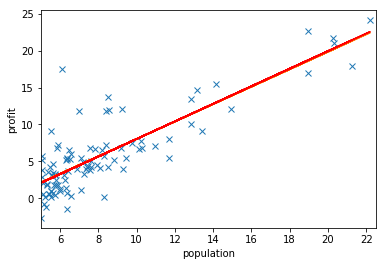

In [12]:
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:, 0]
y = data[:, 1]
plot_dot_image(X, y)
m = np.alen(y)
# 转化为matrix
y = np.mat(y.reshape(m, 1))

# 给X 添加一个常数列
X = np.mat(np.c_[np.ones((m, 1), dtype=np.int), X])

theta = np.mat(np.zeros((2, 1), dtype=np.int))
iterations = 2000
alpha = 0.01
# compute cost
J = cost_function(X, y, theta)
print("when theta = ", theta, "\n cost :", J)

# gradient descent
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
print("theta = ", theta)
print("J_history = ", J_history)

# plot 预测的直线
plt.plot(X[:, 1], X * theta, '-')

# normal equation
theta_ne = normal_equation(X, y)
print("theta_ne = ", theta_ne)

plt.plot(X[:, 1], X * theta_ne, '-r')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()